<a href="https://colab.research.google.com/github/hankaj/Machine-Learning-Techniques/blob/master/ML2021_Assesment_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML2021 - Assesment Work (Regression)

The challenge is to predict Workers Compensation claims using realistic data.

**Model Evaluation**: MSE, $R^2$, ...

## Data Loading 




1. Download the train data

In [95]:
!wget https://github.com/curso-iabd-uclm/machinelearning/raw/main/insurance/train.csv

--2022-01-23 16:33:48--  https://github.com/curso-iabd-uclm/machinelearning/raw/main/insurance/train.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/curso-iabd-uclm/machinelearning/main/insurance/train.csv [following]
--2022-01-23 16:33:49--  https://raw.githubusercontent.com/curso-iabd-uclm/machinelearning/main/insurance/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4942050 (4.7M) [text/plain]
Saving to: ‘train.csv.2’

train.csv.2         100%[===================>]   4.71M  --.-KB/s    in 0.06s   

2022-01-23 16:33:49 (81.1 MB/s) - ‘train.csv.2’ saved [4942050/4942050]



In [96]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
0,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
1,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
2,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
3,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170
4,WC2603726,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925


The training set containing 30,000 insurance policies that you can use to train your model.

**Data fields**

-  ClaimNumber: Unique policy identifier
- DateTimeOfAccident: Date and time of accident
- DateReported: Date that accident was reported
- Age: Age of worker
- Gender: Gender of worker
- MaritalStatus: Martial status of worker. (M)arried, (S)ingle, (U)unknown.
- DependentChildren: The number of dependent children
- DependentsOther: The number of dependants excluding children
- WeeklyWages: Total weekly wage
- PartTimeFullTime: Binary (P) or (F)
- HoursWorkedPerWeek: Total hours worked per week
- DaysWorkedPerWeek: Number of days worked per week
- ClaimDescription: Free text description of the claim
- InitialIncurredClaimCost: Initial estimate by the insurer of the claim cost
- **UltimateIncurredClaimCost**: Total claims payments by the insurance company. This is the field you are asked to predict in the test set.

In [97]:
df.columns

Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Age', 'Gender',
       'MaritalStatus', 'DependentChildren', 'DependentsOther', 'WeeklyWages',
       'PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek',
       'ClaimDescription', 'InitialIncurredCalimsCost',
       'UltimateIncurredClaimCost'],
      dtype='object')

In [98]:
df.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
0,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
1,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
2,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
3,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170
4,WC2603726,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925


## Preprocessing

We transform the data in order to allow us the posterior use of the algorithms to build prediction models, for example, missing values, from categories to numbers, ...



####Descriptive statistics using describe funtion


In [118]:
df.describe()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,UltimateIncurredClaimCost
count,36049.000000,36049.000000,36049.000000,36049.000000,36049.000000,36049.000000,36049.000000,3.604900e+04
mean,33.793781,0.121279,0.009570,416.450612,37.766010,4.905684,7749.943993,1.096396e+04
std,12.117152,0.525212,0.106348,243.985721,12.505018,0.547290,18236.222960,3.534762e+04
min,13.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.218868e+02
25%,23.000000,0.000000,0.000000,200.000000,38.000000,5.000000,700.000000,9.268274e+02
50%,32.000000,0.000000,0.000000,393.300000,38.000000,5.000000,2000.000000,3.373446e+03
75%,43.000000,0.000000,0.000000,500.000000,40.000000,5.000000,9500.000000,8.192168e+03
max,79.000000,9.000000,3.000000,7497.000000,640.000000,7.000000,830000.000000,4.027136e+06


### Missing Values

In [99]:
df.shape

(36176, 15)

In [100]:
pd.isnull(df).any()

ClaimNumber                  False
DateTimeOfAccident           False
DateReported                 False
Age                          False
Gender                       False
MaritalStatus                 True
DependentChildren            False
DependentsOther              False
WeeklyWages                   True
PartTimeFullTime             False
HoursWorkedPerWeek            True
DaysWorkedPerWeek            False
ClaimDescription             False
InitialIncurredCalimsCost    False
UltimateIncurredClaimCost    False
dtype: bool

In [101]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [102]:
df.shape

(36049, 15)

To find a concise summary of the dataframe we use info function 

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36049 entries, 0 to 36175
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ClaimNumber                36049 non-null  object 
 1   DateTimeOfAccident         36049 non-null  object 
 2   DateReported               36049 non-null  object 
 3   Age                        36049 non-null  int64  
 4   Gender                     36049 non-null  object 
 5   MaritalStatus              36049 non-null  object 
 6   DependentChildren          36049 non-null  int64  
 7   DependentsOther            36049 non-null  int64  
 8   WeeklyWages                36049 non-null  float64
 9   PartTimeFullTime           36049 non-null  object 
 10  HoursWorkedPerWeek         36049 non-null  float64
 11  DaysWorkedPerWeek          36049 non-null  int64  
 12  ClaimDescription           36049 non-null  object 
 13  InitialIncurredCalimsCost  36049 non-null  int

### OneHotEncoding 

[OneHotEncoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [104]:
df_OneHot = pd.get_dummies(df[['Gender','MaritalStatus', 'PartTimeFullTime']])
df_OneHot

,Gender_F,Gender_M,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F,PartTimeFullTime_P
0,0,1,0,1,0,0,1,0
1,1,0,0,1,0,0,1,0
2,0,1,0,0,0,1,1,0
3,0,1,0,0,1,0,1,0
4,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...
36171,1,0,0,0,1,0,1,0
36172,0,1,0,1,0,0,1,0
36173,1,0,0,1,0,0,0,1
36174,0,1,0,1,0,0,1,0


> At the begining only the numerical and the encoded features must be considered.

> At the end of the work you can include text, date information and so on.

In [105]:
df_full = pd.concat([df, df_OneHot], axis = 1)
df_full.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost,Gender_F,Gender_M,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F,PartTimeFullTime_P
0,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388,0,1,0,1,0,0,1,0
1,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819,1,0,0,1,0,0,1,0
2,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087,0,1,0,0,0,1,1,0
3,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170,0,1,0,0,1,0,1,0
4,WC2603726,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925,0,1,0,1,0,0,1,0


### Train and test split

In [106]:
x_features = ['WeeklyWages', 'HoursWorkedPerWeek', 'InitialIncurredCalimsCost']


In [107]:
from sklearn.model_selection import train_test_split
X = df[x_features]
y = df['UltimateIncurredClaimCost']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)


## Basic Modeling 

We’ll be exploring Linear Regression using scikit-learn in python.

We will use the selected features to predict the results. 

Linear regression produces a model in the form:


 $$
 Y_{t}=\beta _{0}+\beta _{1}X_{1}+\beta _{2}X_{2}+\cdots +\beta _{p}X_{p}+\varepsilon
 $$

The way this is accomplished is by minimising the residual sum of squares, given by the equation below:
$$
RSS=Σni=1(yi–y^i)2
$$

$$
RSS=Σni=1(yi–β0^–β1^x1–β2^x2–…–βp^xp)
$$


Scikit-learn provides a LinearRegression function for doing this job.
Linear Regression (Dummy Model)

In [108]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Now that our model is trained, we can view the coefficients of the model using regression_model.coef_, which is an array of tuples of coefficients.

In [109]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[idx]))

The coefficient for WeeklyWages is 9.794779343746388
The coefficient for HoursWorkedPerWeek is -25.675661234818307
The coefficient for InitialIncurredCalimsCost is 0.7743349854415342


Note that, because we’ve not done any feature scaling or dimensionality reduction, we can’t say anything about the relative importance of each of our features given these coefficients because the features are not of the same scale.

In [110]:
y_pred = model.predict(X_test)

In [111]:
from sklearn import metrics
print ("MAE:", metrics.mean_absolute_error(y_pred , y_test))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_pred , y_test))
print ("MSE:", metrics.mean_squared_error(y_pred , y_test))
print ("R^2:", metrics.r2_score(y_pred , y_test))


MAE: 7979.755264779615
MAPE: 0.8024366465210745
MSE: 547594288.9830517
R^2: -1.5990659116870134


###Analysis


Analysing the count of different freautures using count plot


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
univariate=['Age','Gender','MaritalStatus','DependentChildren','DependentsOther','PartTimeFullTime','DaysWorkedPerWeek']
for col in univariate:
    plt.figure(figsize = (6,4))
    sns.countplot(x=col,data =df)

Viewing the distribution of target variable using dist plot


In [ ]:
import warnings
warnings.filterwarnings("ignore")
df['UltimateIncurredClaimCost'].hist(bins=25)
plt.show()
sns.distplot(df['UltimateIncurredClaimCost'],color='g')
plt.show()
sns.boxplot(df['UltimateIncurredClaimCost'],color='r')

Comparison of the insurance paid depending on the Age


In [ ]:
sns.barplot(x='Age',y='UltimateIncurredClaimCost',data=df)


Comparison of the insurance paid depending on the quantity of days worked per week

In [ ]:
sns.barplot(x='DaysWorkedPerWeek',y='UltimateIncurredClaimCost',data=df)


# 1. BaseLine (kNN or DecisionTrees)

- Feature Selection
- CrossValidation 
   - kNN: k, weights, metric (manhattan, euclidean)
   - Decisiontrees: max_depth


####Feature Selection


Feature 0: 0.732583
Feature 1: 1564.329098
Feature 2: 749.574925
Feature 3: 0.279625
Feature 4: 0.054579
Feature 5: 68.987792
Feature 6: 4547.396388
Feature 7: 4105.057271
Feature 8: 211.976187
Feature 9: 4021.261110
Feature 10: 4568.377806
Feature 11: 0.634457
Feature 12: 598.764591
Feature 13: 2882.657353


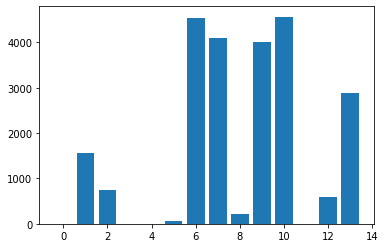

In [115]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# X, y = make_regression(n_samples=30000, n_features=14, n_informative=10, noise=0.1, random_state=42)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

 

####Cross validaton


#####Training the model with the training data


Throughtout testing the different values, to chosen 35 in the range iccured to be sufficent

Min Value uniform : 62.399243143684984 (11)
Min Value distance : 61.999881762633 (11)


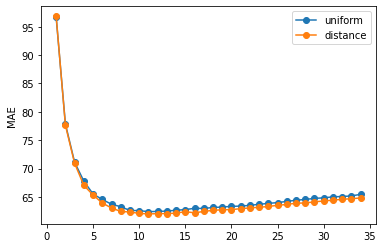

In [117]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np



cv = KFold(n_splits = 10, shuffle = True)
for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,35):
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
       for train_index, test_index in cv.split(X):
          X_train_fs, X_test_fs = X[train_index], X[test_index] 
          y_train, y_test = y[train_index], y[test_index]
          # entrenamiento y ejecución del modelo
          knn.fit(X_train_fs, y_train)
          y_pred = knn.predict(X_test_fs)
          # evaluación del modelo
          mae = metrics.mean_absolute_error(y_pred , y_test)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')      
    

plt.legend()
plt.show() 



Now we know the best parametrization, so we can now execute the model

The number of neighbors chosen occured to optimal 

In [119]:
from sklearn import metrics
# constructor
n_neighbors = 15
weights = 'uniform'
knn = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights) 
# fit and predict

knn.fit(X_train_fs, y_train)
y_pred = knn.predict(X_test_fs)
mae= metrics.mean_absolute_error(y_test, y_pred)
print('MAE', mae)


MAE 62.724844865423485


Here we are visualising our prediction:

Text(0.5, 1.0, "KNeighborsRegressor (k = 15, weights = 'uniform')")

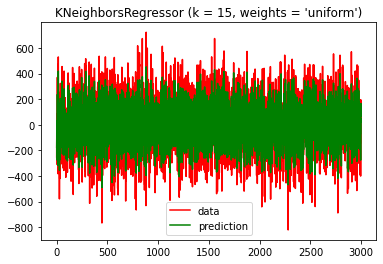

In [120]:
from sklearn.metrics import mean_absolute_error
                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(len(y_test)))
plt.plot(xx, y_test, c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))


# 2. Optimized Model (RandomForests, Boosting + Hyperparameter Optimization)

Due to hyperparameter optimization: observations showed that the number '100' of estimators is optimal

In [121]:
from sklearn.ensemble import RandomForestRegressor
def RandomForest(X_train, X_test):
    #1.1 Model Parametrization 
    regressor = RandomForestRegressor(n_estimators= 100, max_depth = 5, criterion='mae', random_state=0)
    #1.2 Model construction
    regressor.fit(X_train_fs, y_train)
    # Test
    y_pred = regressor.predict(X_test)
    # mae = metrics.mean_absolute_error(y_test,y_pred)
    print ("Error Measure ",  mae, "\n")
    xx = np.stack(i for i in range(len(y_test)))
    plt.scatter(xx, y_test, c='r', label='data')
    plt.plot(xx, y_pred, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("RandomForests Regressor")

    plt.show()
    return regressor

Error Measure  62.724844865423485 



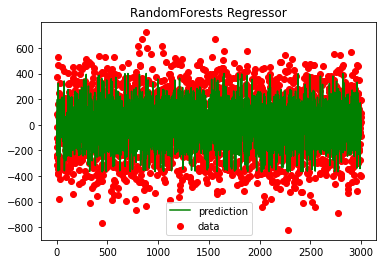

In [122]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForest(X_train_fs, X_test_fs)

Boosting:

Hyperparameter optimization: again, optimal chosen number of estimators and maxdepth

In [124]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingRegressor


import numpy as np    
from sklearn.metrics import mean_absolute_error 
def Boosting(X_train_fs, X_test_fs):
    # Model Parametrization 
    regressor = GradientBoostingRegressor(n_estimators= 100, max_depth = 5, criterion='mae', random_state=0)
    # Model construction
    regressor.fit(X_train_fs, y_train)
    # Test
    y_pred = regressor.predict(X_test_fs)
    mae = mean_absolute_error(y_test,y_pred)
    print ("Error Measure ",  mae, "\n")
    xx = np.stack(i for i in range(len(y_test)))
    plt.scatter(xx, y_test, c='r', label='data')
    plt.plot(xx, y_pred, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("RandomForests Regressor")

    plt.show()
    return regressor

Error Measure  25.04172748559429 



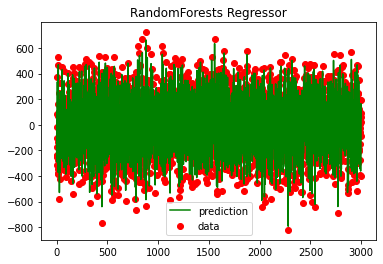

In [125]:
model = Boosting(X_train_fs, X_test_fs)

# 3. Improvements (Include text data, other changes)

Improvements performed: Description of the data, analysis of the influence of particular data